# **SOURCE** : THE DATA IS COLLECTED FROM **UCI MACHINE LEARNING REPOSITORY** OF A SMART SMALL SCALE STEEL INDUSTRY
#**LINK:**
*https://archive.ics.uci.edu/dataset/851/steel+industry+energy+consumption*


# **OBJECTIVE**
WE WILL BE WORKING ON **PREDICTIVE ENERGY CONSUMPTION MODEL**.WE WILL BE USING STATISTICAL ALGORITHM **MULTIPLE LINEAR REGRESSION** TO PREDICT THE ENERGY CONSUMPTION.
WE WILL ALSO BE EVALUATING THE MODEL'S PREDICTION USING **ROOT MEAN SQUARED ERROR,MEAN ABSOLUTE ERROR AND COEFFICIENT OF VARIATION**

# **IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# **UPLOAD CSV**

In [15]:
dataset = pd.read_csv("/content/Steel_industry_data.csv")


# **STEP 3: DATA EXPLORATION AND PREPROCESSING**

In [20]:
dataset = dataset.drop(columns=['Day_of_week','WeekStatus'])
print(dataset.head())
print(dataset.describe())
rows,columns = dataset.shape
print(f'The dataset has {rows} rows and {columns} columns')
print(dataset.info())

   Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0       3.17                                  2.95   
1       4.00                                  4.46   
2       3.24                                  3.28   
3       3.31                                  3.56   
4       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  
0                         73.21                         100.0   900  
1                         66.77                         100.0  1800  
2                         70.28                         100.0  2700  
3                         68.09                         100.0  3600  


***checking for missing value***

In [14]:
missing_values = dataset.isnull().sum()
print(missing_values)

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64


***REMOVES EVERY COLUMN WITH A MISSING VALUE***

In [6]:
dataset.dropna(inplace=True)

# **SET UP VARIABLES**

In [26]:
x = dataset.drop(columns=['Usage_kWh'])
y = dataset['Usage_kWh']


# **DATA SPLITTING - TRAIN/TEST SPLIT METHOD**

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# **TRAIN MODEL - LINEAR REGRESSION MODELING**

In [29]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# **MODEL EVALUATION**

In [32]:
y_pred = model.predict(x_test)

In [33]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'mean squared error: {mse}')
print(f'R-squared: {r2:.2f}')


mean squared error: 17.901529232628477
R-squared: 0.98


# **VISUALIZATION**

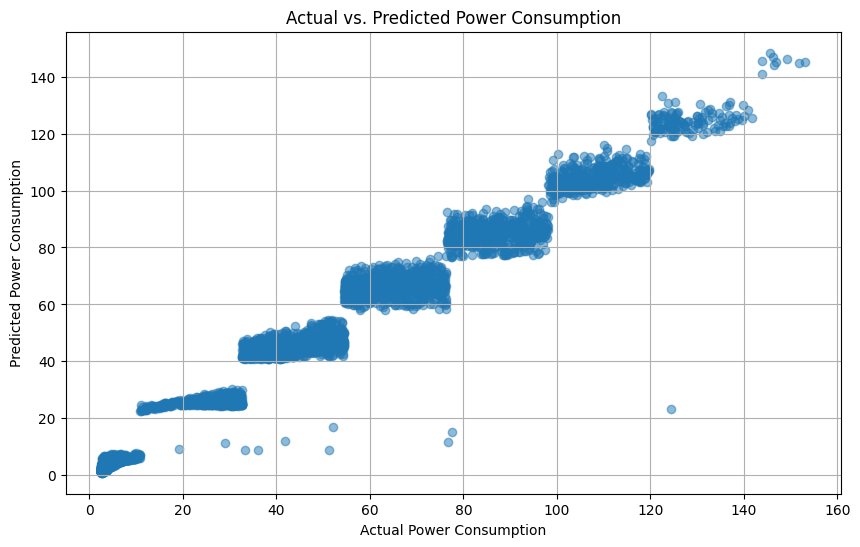

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Power Consumption')
plt.ylabel('Predicted Power Consumption')
plt.title('Actual vs. Predicted Power Consumption')
plt.grid(True)
plt.show()

# **INTERPRETATION**

In [36]:
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:")
for feature, coef in zip(x.columns, coefficients):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {intercept:.2f}")

Coefficients:
Lagging_Current_Reactive.Power_kVarh: 0.34
Leading_Current_Reactive_Power_kVarh: 0.14
CO2(tCO2): 1646.18
Lagging_Current_Power_Factor: 0.14
Leading_Current_Power_Factor: 0.08
NSM: 0.00
Intercept: -14.98


In [46]:
correlation_matrix = dataset.corr()
correlation_with_Usage_kWh = correlation_matrix['Usage_kWh'].drop('Usage_kWh').apply(lambda x: f"{x:.2f}")
correlation_with_Usage_kWh.sort_values(ascending=False)

,Usage_kWh
CO2(tCO2),0.99
Lagging_Current_Reactive.Power_kVarh,0.90
Lagging_Current_Power_Factor,0.39
Leading_Current_Power_Factor,0.35
NSM,0.23
Leading_Current_Reactive_Power_kVarh,-0.32


# **VISUALIZING CORRELATION**

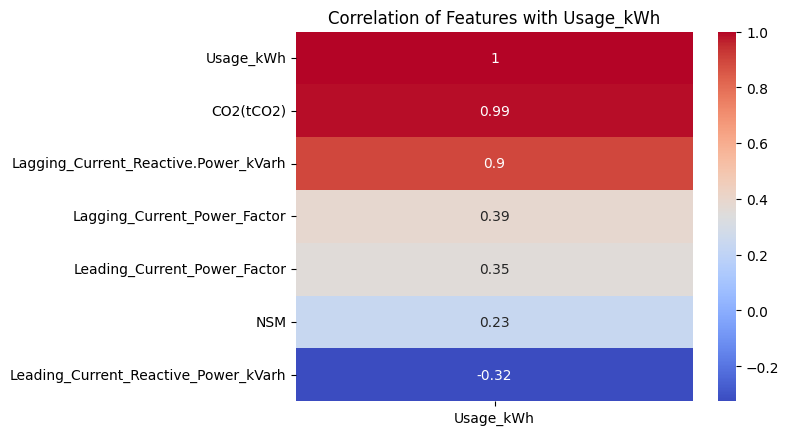

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(dataset.corr()[['Usage_kWh']].sort_values(by='Usage_kWh', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Usage_kWh")
plt.show()